# Unit step response

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotting_functions import *
from estimation import *
import matplotlib.gridspec as gridspec

In [55]:
def find_unitstep_response(model, parameter_table):
    taulist = np.array(parameter_table.loc[model,'tau1':'tau4'])
    a_n = np.array(parameter_table.loc[model,'a_1':'a_4'])
    b_n = np.array(parameter_table.loc[model,'b_1':'b_4'])
    F2x = parameter_table.loc[model,'F2x']
    T2x = parameter_table.loc[model,'T2x']

    dim = len(taulist)
    if any(a_n == 0):
        dim = np.count_nonzero(a_n[:dim])
        zeroindex = np.where(a_n == 0)[0]
        a_n = np.delete(a_n,zeroindex)
        b_n = np.delete(b_n,zeroindex)
        taulist = np.delete(taulist,zeroindex)
    #fbparlist = (b_n/a_n)[:dim]
    a_n_unitforcing = a_n[:dim]/(2*F2x)
    T_comp =  a_n_unitforcing*tas_predictors(t, fixed_par = taulist, exptype = 'stepforcing')
    T = np.sum(T_comp,axis=1)
    return T

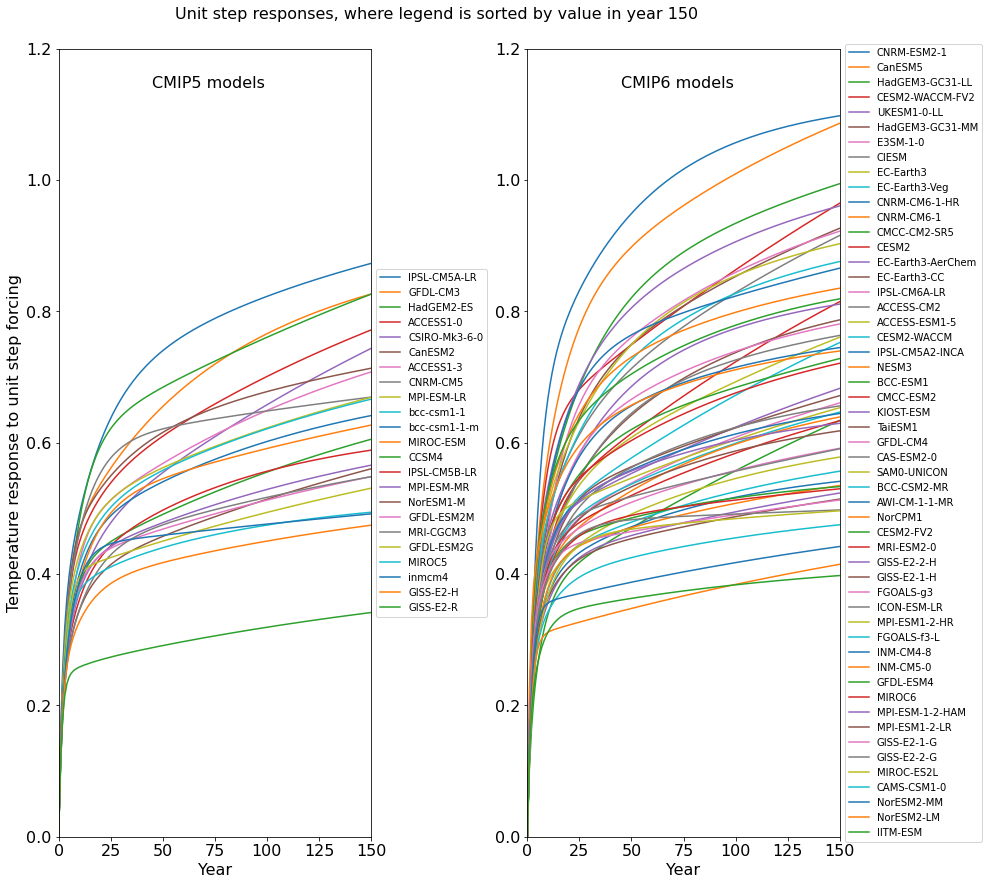

In [88]:

t = np.arange(0,151)
fig, ax = plt.subplots(ncols = 2, figsize = (14,14.5))
plt.subplots_adjust(wspace = 0.5)
plt.suptitle('Unit step responses, where legend is sorted by value in year 150', fontsize = 16, y = 0.92)

####### CMIP5 models #######:
filename = 'best_estimated_parameters_cmip5.txt'
parameter_table = pd.read_csv('../Estimates/CMIP5_forcing_estimates/' + filename, index_col=0, sep = '\t')
models = parameter_table.index
T_endvalues_cmip5 = {}
for model in models:
    T = find_unitstep_response(model, parameter_table)
    T_endvalues_cmip5[model] = T[-1]

# dictionary sorted by end values: 
T_endvalues_cmip5_sorted = dict(reversed(sorted(T_endvalues_cmip5.items(), key=lambda item: item[1])))
# plot in this order
for model in T_endvalues_cmip5_sorted.keys():
    T = find_unitstep_response(model, parameter_table)
    ax[0].plot(T, label = model)

ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[0].text(0.3,0.95, 'CMIP5 models',transform=ax[0].transAxes, fontsize=16)
ax[0].set_ylabel('Temperature response to unit step forcing',fontsize=16)

####### CMIP6 models #######:
filename = 'best_estimated_parameters_allmembers.csv'
parameter_table = pd.read_csv('../Estimates/' + filename, index_col=0)
models = parameter_table.index
T_endvalues_cmip6 = {}
for model in models:
    T = find_unitstep_response(model, parameter_table)
    T_endvalues_cmip6[model] = T[-1]
    
T_endvalues_cmip6_sorted = dict(reversed(sorted(T_endvalues_cmip6.items(), key=lambda item: item[1])))    
for model in T_endvalues_cmip6_sorted.keys():
    T = find_unitstep_response(model, parameter_table)    
    ax[1].plot(T, label = model)

ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[1].text(0.3,0.95, 'CMIP6 models',transform=ax[1].transAxes, fontsize=16)
# CNRM-ESM2-1 has a strong response per unit forcing, to compensate for the low forcing estimate

for axis in ax:
    axis.set_ylim(0,1.2)
    axis.set_xlim(0,150)
    axis.tick_params(axis='both',labelsize=16)
    axis.set_xlabel('Year',fontsize=16)